IMPORT

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

READ DATA

In [2]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


VISUALIZATION

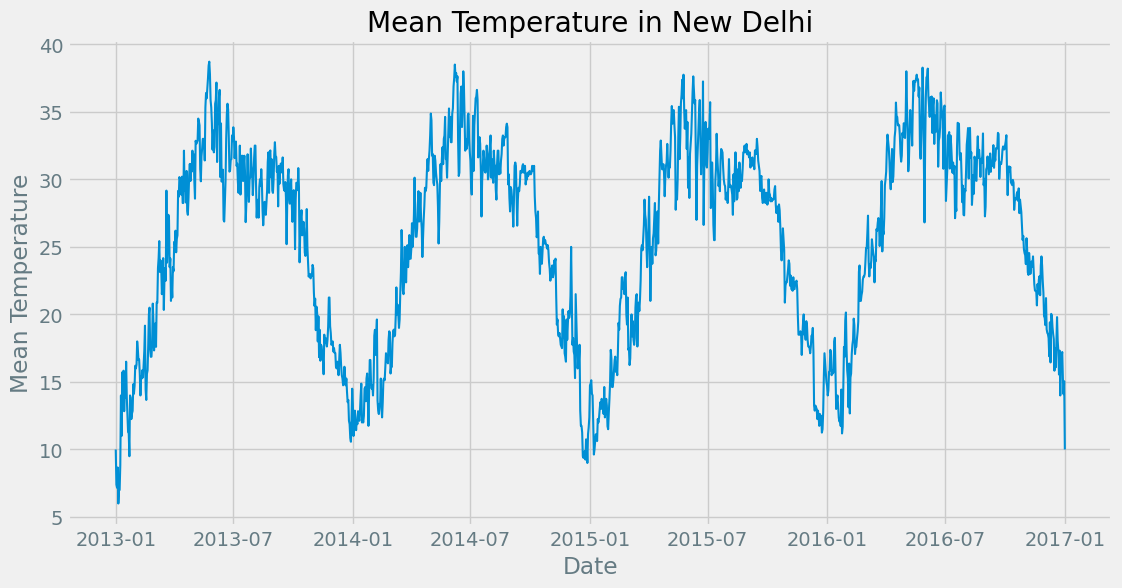

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['meantemp'], linewidth=1.5)
plt.title('Mean Temperature in New Delhi')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()

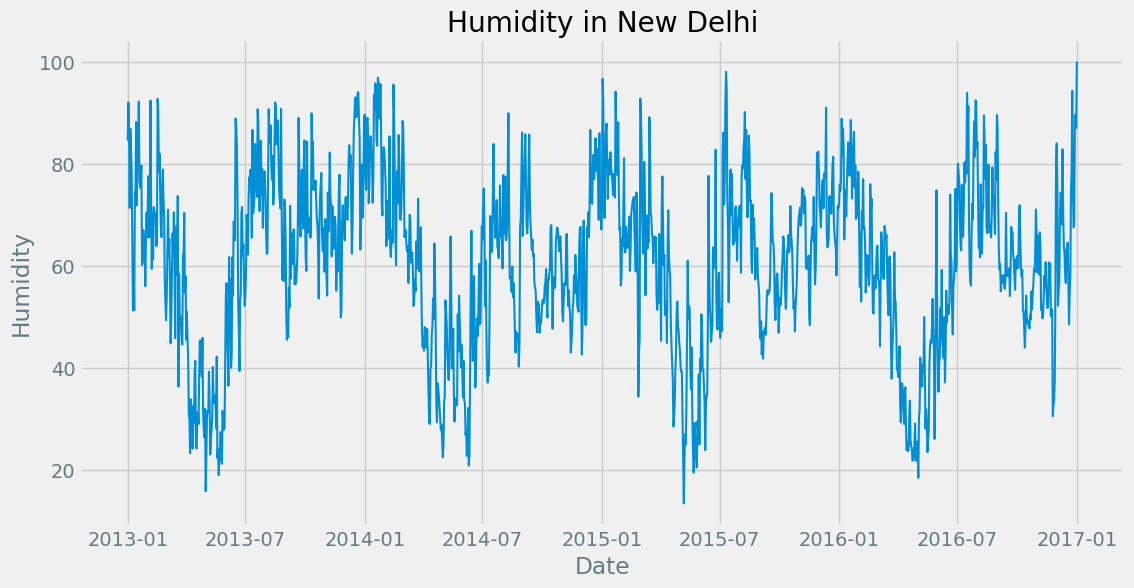

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['humidity'], linewidth=1.5)
plt.title('Humidity in New Delhi')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.show()

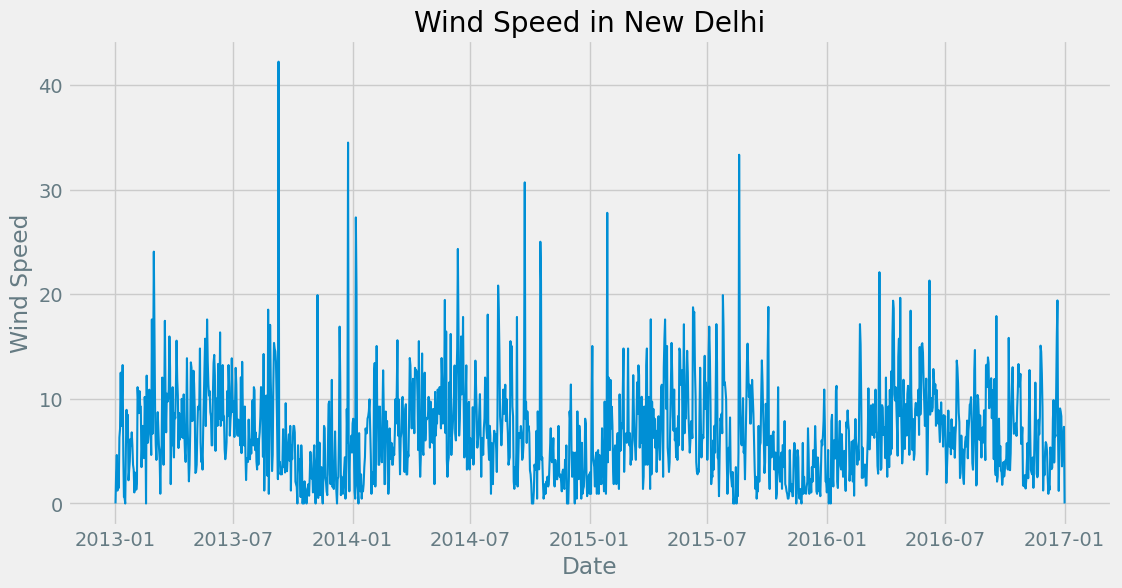

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['wind_speed'], linewidth=1.5)
plt.title('Wind Speed in New Delhi')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.show()

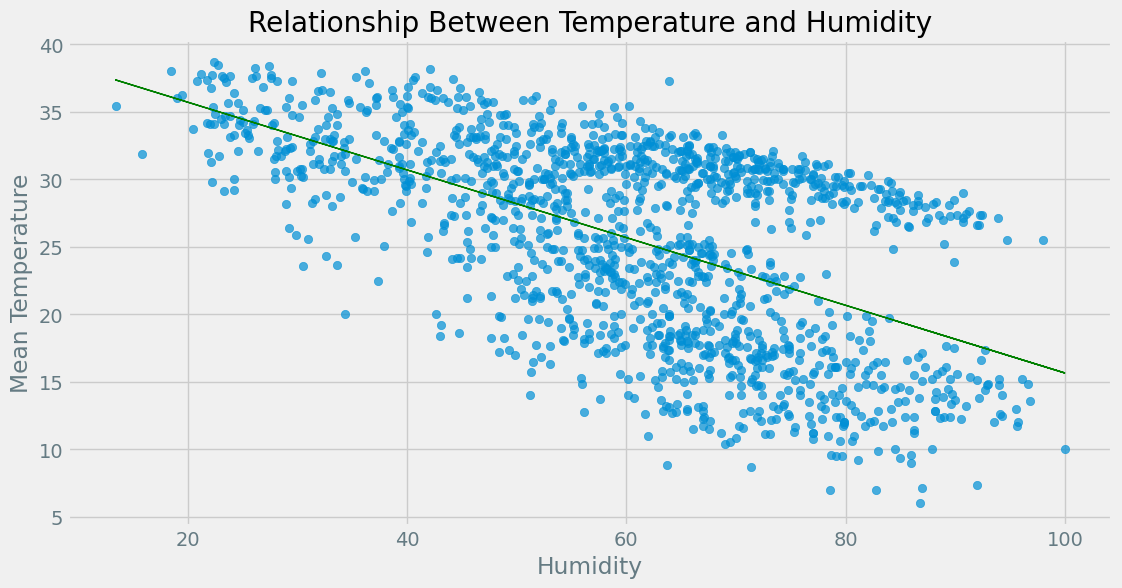

In [102]:
plt.figure(figsize=(12, 6))
plt.scatter(df['humidity'], df['meantemp'], alpha=0.7)
plt.title('Relationship Between Temperature and Humidity')
plt.xlabel('Humidity')
plt.ylabel('Mean Temperature')
humidity = df['humidity'].values.reshape(-1, 1)
meantemp = df['meantemp'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(humidity, meantemp)
predicted_meantemp = reg.predict(humidity)
plt.plot(df['humidity'], predicted_meantemp, color='green', linewidth=1)

plt.show()

ANALYZING

In [18]:
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df["month"] = df["date"].dt.month
print(df.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


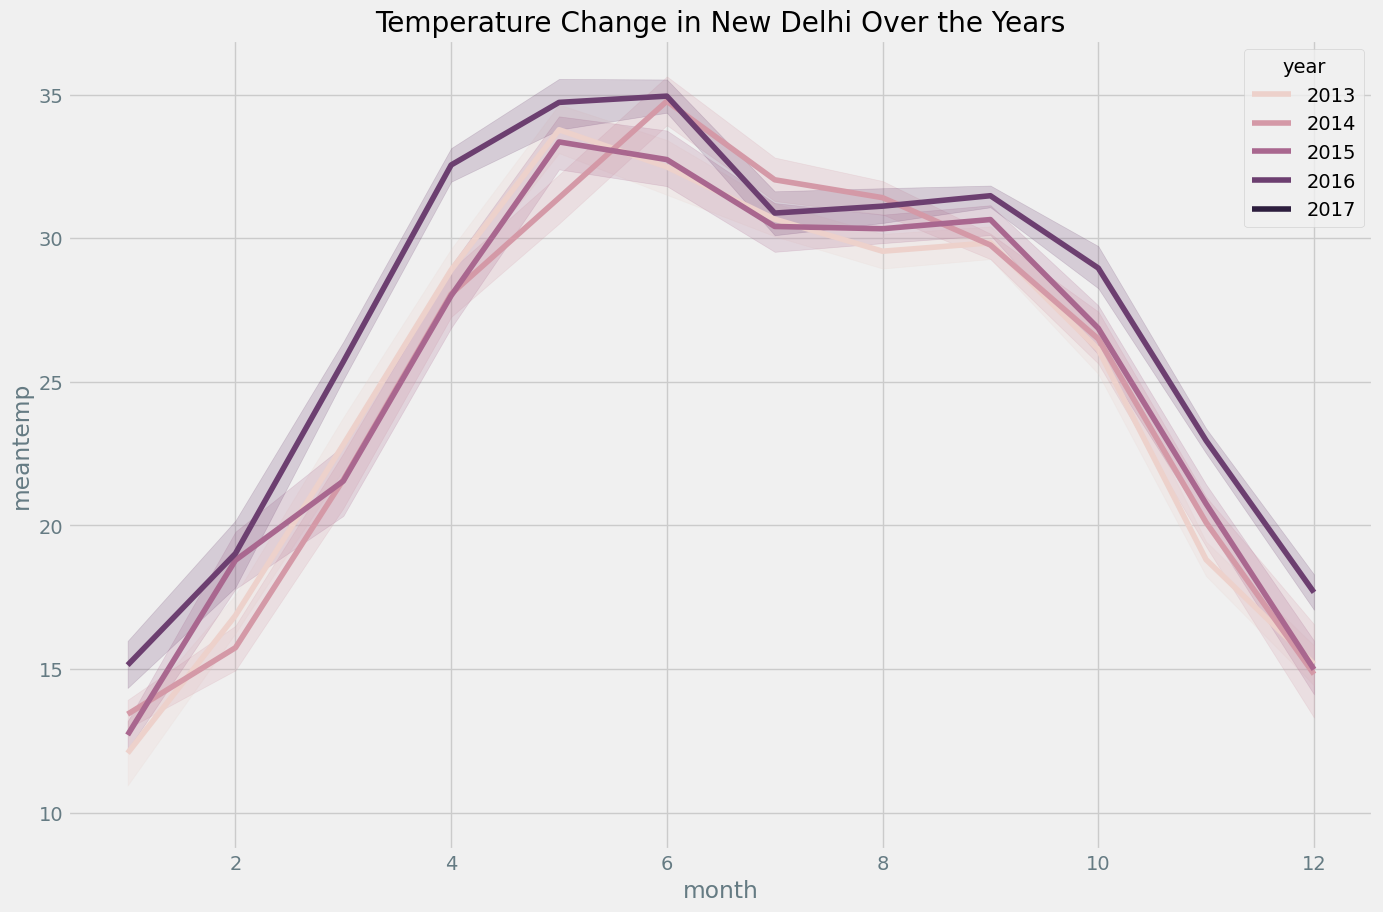

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in New Delhi Over the Years")
sns.lineplot(data=df, x='month', y='meantemp', hue='year')
plt.show()

TRAINING MODEL 

In [33]:
forecast_data = df.rename(columns={"date": "ds", "meantemp": "y"})
forecast_data.head()

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [45]:
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=366)
prediction = model.predict(forecasts)
plot_plotly(model, prediction)

09:05:04 - cmdstanpy - INFO - Chain [1] start processing
09:05:04 - cmdstanpy - INFO - Chain [1] done processing


TESTING

In [75]:
test_df = pd.read_csv("DailyDelhiClimateTest.csv")
test_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [76]:
test_df["date"] = pd.to_datetime(test_df["date"], format = '%Y-%m-%d')
test_df['year'] = test_df['date'].dt.year
test_df["month"] = test_df["date"].dt.month
test_df = test_df.rename(columns={"date": "ds", "meantemp": "y"})
test_df.head()

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1


In [80]:
comparison_df = test_df.merge(prediction, on='ds', how='left')
realistic = comparison_df['y']
predicted = comparison_df['yhat']
mae = mean_absolute_error(realistic, predicted)
mse = mean_squared_error(realistic, predicted)
r2 = r2_score(realistic, predicted)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {mse:.4f}")
print(f"R2 Score (R2): {r2:.4f}")

Mean Absolute Error (MAE): 2.1925
Root Mean Squared Error (RMSE): 7.1289
R2 Score (R2): 0.8222
